### Student Information
Name:藍裕捷

Student ID:104061202

GitHub ID:eugene08976

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

# **First Part(take home exercise)**

In [1]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

comp.graphics
comp.graphics
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
soc.religion.christian
sci.med
sci.med
sci.med


In [5]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

/Users/eugenelan/.pyenv/versions/3.6.8/envs/eugene/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/eugenelan/.pyenv/versions/3.6.8/envs/eugene/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [7]:
# get the 0th and the 10th elements from the index in the ‘category_name’ column
X.loc[X.index[[0, 10]], 'category_name']

0              comp.graphics
10    soc.religion.christian
Name: category_name, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [8]:
# add category to the dataframe
X['category'] = twenty_train.target

In [9]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [10]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [11]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

The objects in arrays will be identified as null/missing value when they are none(empty is treated as none) or NaN.'NaN,'None'and'' will still be seen as a value.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [12]:
X_sample = X.sample(n=1000) #random state
len(X_sample)

1000

In [13]:
X_sample[0:4]

text  category  \
432   From: banschbach@vms.ocom.okstate.edu Subject:...         2   
1812  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
1406  From: livesey@solntze.wpd.sgi.com (Jon Livesey...         0   
769   From: dlecoint@garnet.acns.fsu.edu (Darius_Lec...         3   

               category_name  
432                  sci.med  
1812                 sci.med  
1406             alt.atheism  
769   soc.religion.christian

In [14]:
# Next, we check the distribution of each categories
for category in categories:
    num_origin = len(X.category_name[lambda x: x == category])
    num_sample = len(X_sample.category_name[lambda x: x == category])
    rate_origin = num_origin / len(X) * 100
    rate_sample = num_sample / len(X_sample) * 100
    print('Number of %-22s, changes from %d (%.2f%%) to %d (%.2f%%)' % \
          (category, num_origin, rate_origin, num_sample, rate_sample))

Number of alt.atheism           , changes from 480 (21.27%) to 194 (19.40%)
Number of soc.religion.christian, changes from 599 (26.54%) to 261 (26.10%)
Number of comp.graphics         , changes from 584 (25.88%) to 278 (27.80%)
Number of sci.med               , changes from 594 (26.32%) to 267 (26.70%)


In [81]:
X_sample[0:10]

text  category  \
432   From: banschbach@vms.ocom.okstate.edu Subject:...         2   
1812  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
1406  From: livesey@solntze.wpd.sgi.com (Jon Livesey...         0   
769   From: dlecoint@garnet.acns.fsu.edu (Darius_Lec...         3   
422   From: renggli@masg1.epfl.ch (loris renggli) Su...         1   
383   From: tw2@irz.inf.tu-dresden.de (Thomas Wolf) ...         1   
114   From: jbulf@balsa.Berkeley.EDU (Jeff Bulf) Sub...         1   
1609  From: mangoe@cs.umd.edu (Charley Wingate) Subj...         0   
2136  From: kempmp@phoenix.oulu.fi (Petri Pihko) Sub...         0   
537   From: scrowe@hemel.bull.co.uk (Simon Crowe) Su...         1   

               category_name  
432                  sci.med  
1812                 sci.med  
1406             alt.atheism  
769   soc.religion.christian  
422            comp.graphics  
383            comp.graphics  
114            comp.graphics  
1609             alt.atheism  
2136             alt.atheism  
537            comp.graphics

In [82]:
X[0:10]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name  bin_category bin_category_name  
0           comp.graphics  [0, 1, 0, 0]      [0, 0, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]      [0, 0, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
3  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
4  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
5  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
6  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
7                 sci.med  [0, 0, 1, 0]      [0, 0, 0, 0]  
8                 sci.med  [0, 0, 1, 0]      [0, 0, 0, 0]  
9                 sci.med  [0, 0, 1, 0]      [0, 0, 0, 0]

We can see that the precenatage of four categories changed after the .sample applied.Besides,the order of the sample is random and varies everytime we applied the function due to the fact we did not fix the random seed.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

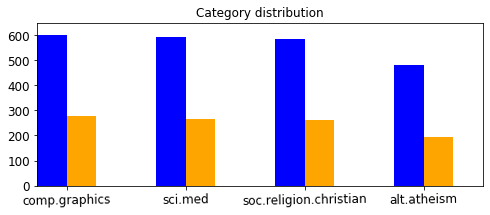

In [16]:
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],   
                                    align = "edge", width = -0.25,
                                    color =  "blue",rot = 0, fontsize = 11, figsize = (8,3))

X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 650], 
                                           align = "edge", width = 0.25,
                                           color =  "orange", rot = 1, fontsize = 12, figsize = (8,3))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [18]:
import numpy as np
feat_names = count_vect.get_feature_names()[0:100]      # Get names for first 100 features
idx = np.where(X_counts[4, 0:100].toarray()[0] == 1)[0] # Get indices of the term that occurs in the document
print("Indexes of 1s: ", idx)
print("The term is: ",feat_names[idx[1]]) 

Indexes of 1s:  [ 0 37]
The term is:  01


### **>>> Exercise 11 (take home):** 
#### From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [19]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [20]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [21]:
plot_z = X_counts[0:20, 0:20].toarray()

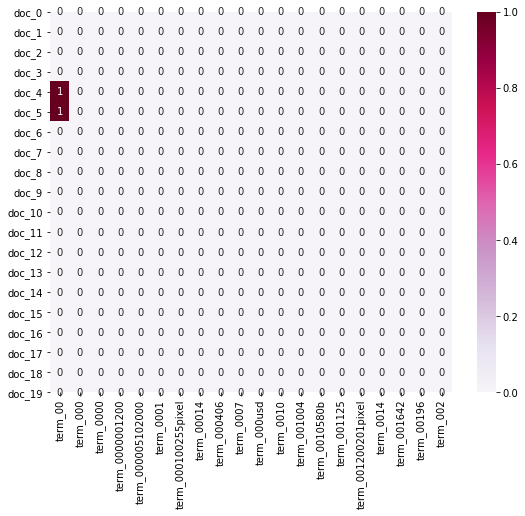

In [22]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [23]:
from sklearn.decomposition import PCA

### By adding stop_words, we can reduce the words that is relatively important. 
### I added min_df and max_df  to calulate the df, removing the words that appears too frequently or the opposite. So the reserved  is more representative. Then, by max_features, I select the top 20 words, resulting in a matrix that is not so sparse.

In [24]:
# pick top 20 words
count_vect_my = CountVectorizer(stop_words='english', max_features=20, min_df=0.02, max_df=0.6)
X_counts_my = count_vect_my.fit_transform(X.text)
analyze = count_vect_my.build_analyzer()

In [25]:
# pick top 20 documents
selected_X = np.argsort(X_counts_my.toarray().sum(1))[-20:]

In [26]:
plot_x = ["term_"+str(i) for i in count_vect_my.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in selected_X]
plot_z = X_counts_my[selected_X, :].toarray()

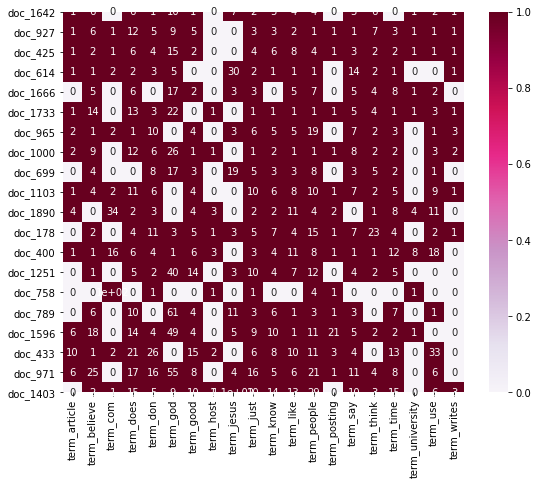

In [27]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [29]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

(2257, 3)


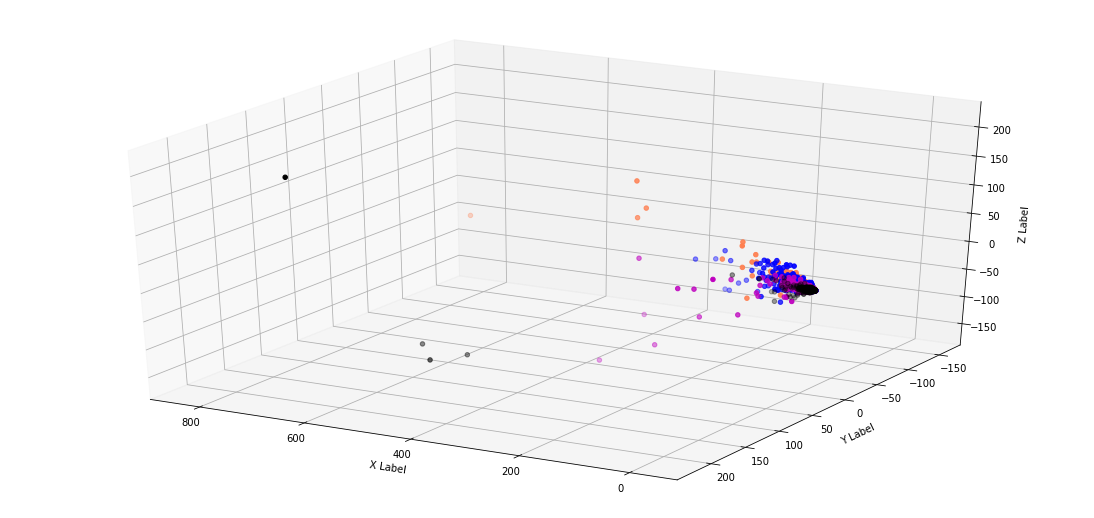

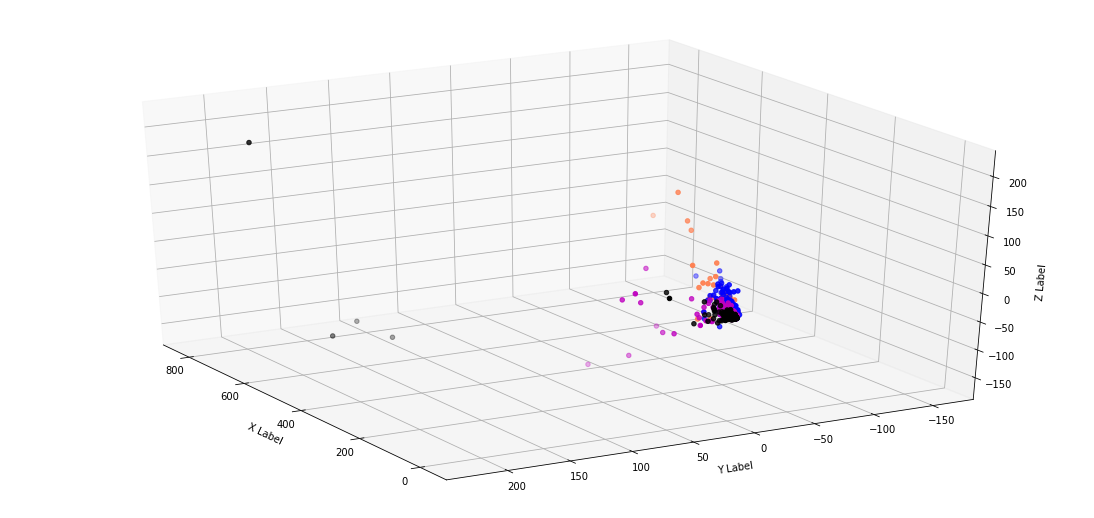

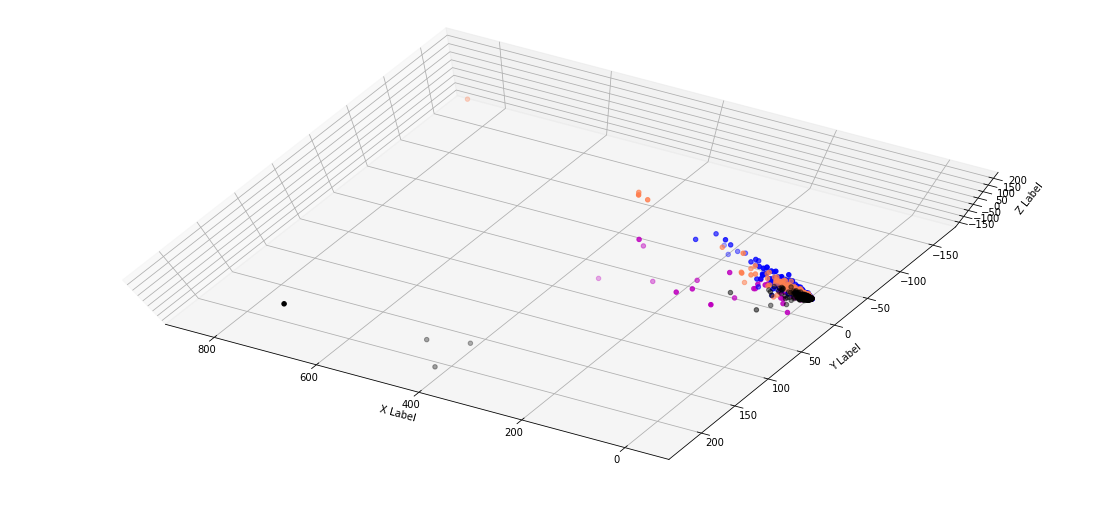

In [30]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

# function to plot 3d-plot
def plot_3d(X_reduced, a, b, categories):                        # a: elevation, b: azimuth
    col = ['coral', 'blue', 'black', 'm']

    # plot
    fig = plt.figure(figsize = (15,7))
    ax = Axes3D(fig)

    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category,0]         # x location
        ys = X_reduced[X['category_name'] == category,1]         # y location
        zs = X_reduced[X['category_name'] == category,2]         # z location
   
        ax.scatter(xs, ys, zs, c=c, marker='o')                  # scatter plot for each category

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(a,b)                                            # set camera position
    plt.show()
    return ax
    
angles=[[30,120], [30,150], [80,120]]                            # give different angles
for ang in angles:
    ax = plot_3d(X_reduced, ang[0], ang[1], categories)

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [31]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [32]:
import plotly.graph_objs as go

df_tf = pd.DataFrame(data = {'term' : count_vect.get_feature_names(), 'frequency' : term_frequencies})

data = {
    "type" : "bar",
    "x" : df_tf.loc[:,'term'],
    "y" : df_tf.loc[:,'frequency'],
    "marker" : {"color": "blue"}
}

layout = {
  "title": "Word Frequency", 
  "width": 800, 
  "yaxis": {
    "title": "Frequency", 
    "gridcolor": "white",
    "range": [0,5000]
  }, 
  "xaxis": {
    "title": "Words", 
    "gridcolor": "white",
    "type": "category"
  }, 
  "dragmode":"zoom",
  "plot_bgcolor": "white", 
  "paper_bgcolor": "white"
}

fig = go.FigureWidget(data=[data], layout = layout)
fig.show()


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [83]:
count_vect_my = CountVectorizer(stop_words='english', max_features=30, min_df=0.02, max_df=0.8)
X_counts_my = count_vect_my.fit_transform(X.text)
term_frequencies = np.asarray(X_counts_my.sum(axis=0))[0]

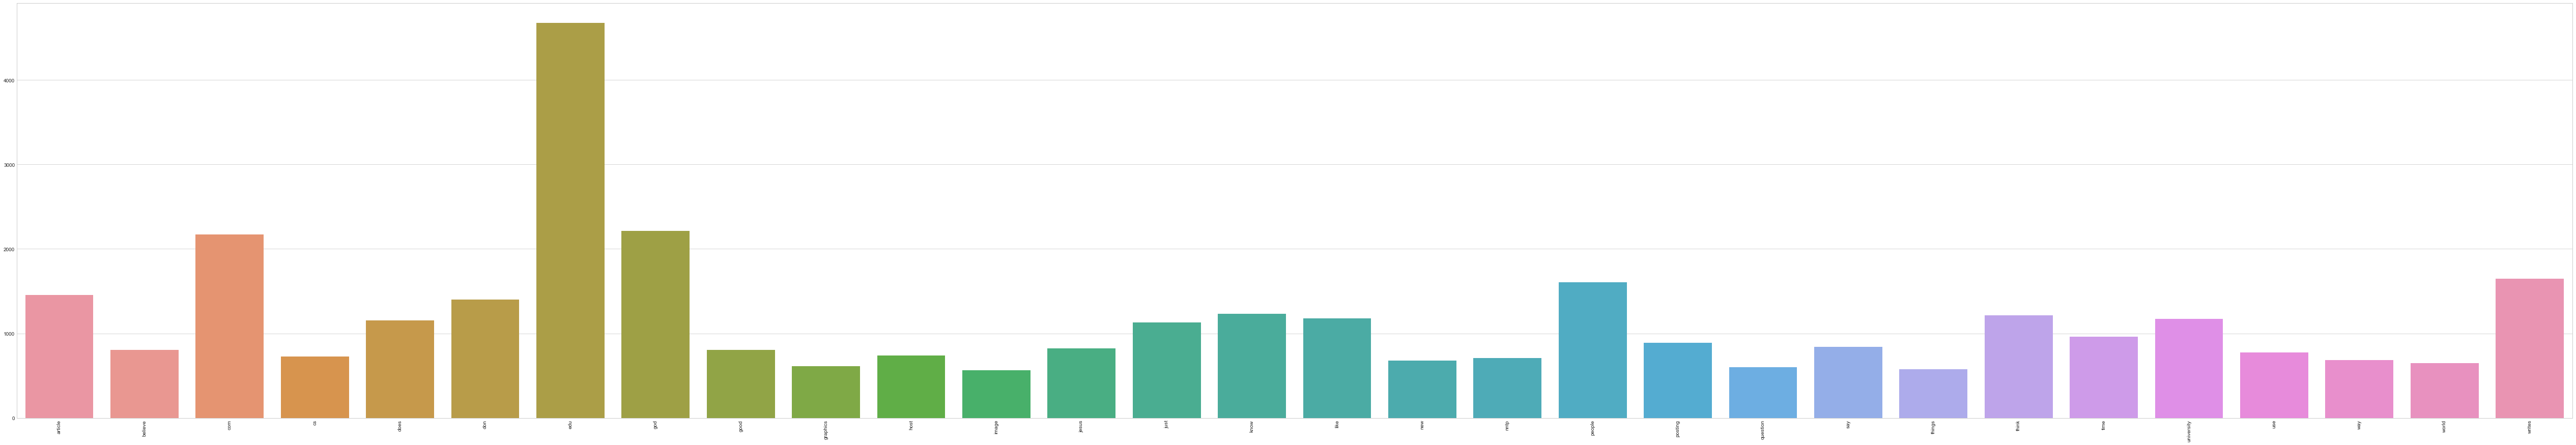

In [85]:
plt.subplots(figsize=(90, 15))
g = sns.barplot(x=count_vect_my.get_feature_names(), 
            y=term_frequencies)
g.set_xticklabels(count_vect_my.get_feature_names(), rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

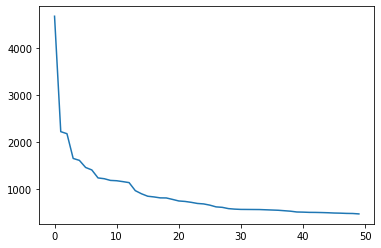

In [35]:
# Answer here
long_tail = sorted(term_frequencies, reverse=True)
plt.plot(long_tail)

In [36]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
X_count_rank_idx = term_frequencies.argsort()[(-len(term_frequencies)):][::-1]
init_notebook_mode(connected=True)   
fig = go.Figure(                                              # plotly gragh object
    data=[go.Bar(y=term_frequencies[X_count_rank_idx])],
    layout_title_text="Term Frequency"
)
fig.update_yaxes(range=[0,max(term_frequencies)+100])
fig.update_xaxes(range=[-0.5, 100.5],                         # show first 100, move plot to see the rest
                 tickangle=270,
                 ticktext=np.array(count_vect.get_feature_names())[X_count_rank_idx],
                 tickvals=np.arange(0,len(term_frequencies[X_count_rank_idx]),1),
                 tickfont=dict(family='serif', color='black', size=10))                             
fig.show()


### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [37]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [38]:
mlb = preprocessing.LabelBinarizer()

In [39]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [40]:
mlb.classes_

array([0, 1, 2, 3])

In [41]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [42]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7                 sci.med  [0, 0, 1, 0]  
8                 sci.med  [0, 0, 1, 0]

In [43]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [44]:
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category bin_category_name  
0           comp.graphics  [0, 1, 0, 0]      [0, 0, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]      [0, 0, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
3  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
4  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
5  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
6  soc.religion.christian  [0, 0, 0, 1]      [0, 0, 0, 0]  
7                 sci.med  [0, 0, 1, 0]      [0, 0, 0, 0]  
8                 sci.med  [0, 0, 1, 0]      [0, 0, 0, 0]

Yes it works!

# **Second Part**

## Data Transformation

In [45]:
import math
import pandas as pd
import numpy as np
import nltk
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [46]:
reviews_yelp = pd.read_csv('yelp_labelled.txt', sep="\t", names=['Sentence', 'label'])
reviews_yelp['Source'] = 'Yelp'

reviews_imdb = pd.read_csv('imdb_labelled.txt', sep="\t", names=['Sentence', 'label'])
reviews_imdb['Source'] = 'IMDB'

reviews_amazon = pd.read_csv('amazon_cells_labelled.txt', sep="\t", names=['Sentence', 'label'])
reviews_amazon['Source'] = 'Amazon'

reviews = pd.concat([reviews_yelp, reviews_imdb, reviews_amazon]).reset_index(drop=True)

reviews['label']= reviews['label'].astype(str)
reviews

Sentence label  Source
0                              Wow... Loved this place.     1    Yelp
1                                    Crust is not good.     0    Yelp
2             Not tasty and the texture was just nasty.     0    Yelp
3     Stopped by during the late May bank holiday of...     1    Yelp
4     The selection on the menu was great and so wer...     1    Yelp
...                                                 ...   ...     ...
2743  The screen does get smudged easily because it ...     0  Amazon
2744  What a piece of junk.. I lose more calls on th...     0  Amazon
2745                       Item Does Not Match Picture.     0  Amazon
2746  The only thing that disappoint me is the infra...     0  Amazon
2747  You can not answer calls with the unit, never ...     0  Amazon

[2748 rows x 3 columns]

In [47]:
reviews.isnull()

Sentence  label  Source
0        False  False   False
1        False  False   False
2        False  False   False
3        False  False   False
4        False  False   False
...        ...    ...     ...
2743     False  False   False
2744     False  False   False
2745     False  False   False
2746     False  False   False
2747     False  False   False

[2748 rows x 3 columns]

In [48]:
reviews.isnull().apply(lambda x: dmh.check_missing_values(x))

Sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
Source      (The amoung of missing records is: , 0)
dtype: object

In [49]:
sum(reviews.duplicated())

17

In [50]:
reviews.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe,keep=true if we want to keep the original data

## 5.  Data Preprocessing
- Tokenization
- Visualization
- Dimensionality Reduction
- Attribute Transformation
- Data Exploation

## Tokenization

In [51]:
reviews['unigrams'] = reviews['Sentence'].apply(lambda x: dmh.tokenize_text(x))

In [52]:
count_vect = CountVectorizer(stop_words='english', max_features=20, min_df=0.01, max_df=0.8)
reviews_counts = count_vect.fit_transform(reviews.Sentence)
analyze = count_vect.build_analyzer()

In [53]:
reviews_counts.shape

(2731, 20)

## Discretization and Binarization

In [54]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(reviews['Source'])
reviews['bin_Source'] = mlb.transform(reviews['Source']).tolist()
reviews

Sentence label  Source  \
0                              Wow... Loved this place.     1    Yelp   
1                                    Crust is not good.     0    Yelp   
2             Not tasty and the texture was just nasty.     0    Yelp   
3     Stopped by during the late May bank holiday of...     1    Yelp   
4     The selection on the menu was great and so wer...     1    Yelp   
...                                                 ...   ...     ...   
2743  The screen does get smudged easily because it ...     0  Amazon   
2744  What a piece of junk.. I lose more calls on th...     0  Amazon   
2745                       Item Does Not Match Picture.     0  Amazon   
2746  The only thing that disappoint me is the infra...     0  Amazon   
2747  You can not answer calls with the unit, never ...     0  Amazon   

                                               unigrams bin_Source  
0                     [Wow, ..., Loved, this, place, .]  [0, 0, 1]  
1                             [Crust, is, not, good, .]  [0, 0, 1]  
2     [Not, tasty, and, the, texture, was, just, nas...  [0, 0, 1]  
3     [Stopped, by, during, the, late, May, bank, ho...  [0, 0, 1]  
4     [The, selection, on, the, menu, was, great, an...  [0, 0, 1]  
...                                                 ...        ...  
2743  [The, screen, does, get, smudged, easily, beca...  [1, 0, 0]  
2744  [What, a, piece, of, junk.., I, lose, more, ca...  [1, 0, 0]  
2745               [Item, Does, Not, Match, Picture, .]  [1, 0, 0]  
2746  [The, only, thing, that, disappoint, me, is, t...  [1, 0, 0]  
2747  [You, can, not, answer, calls, with, the, unit...  [1, 0, 0]  

[2731 rows x 5 columns]

## Visualization

In [55]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]

# obtain document index
selected_reviews = np.argsort(reviews_counts.toarray().sum(1))[-20:]
plot_y = ["doc_"+ str(i) for i in selected_X]

plot_z = reviews_counts[selected_X, :].toarray()

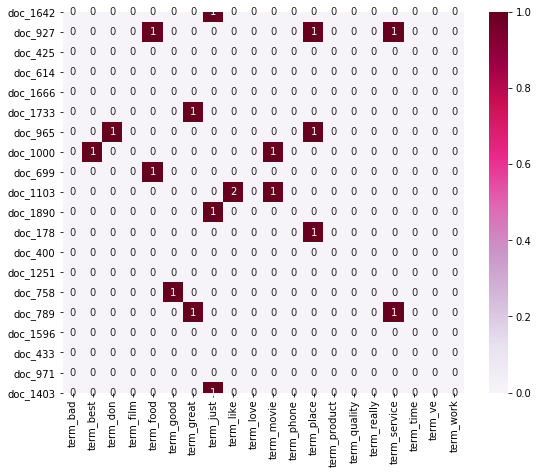

In [56]:
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## Dimensionality reduction(PCA)

In [57]:
result_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

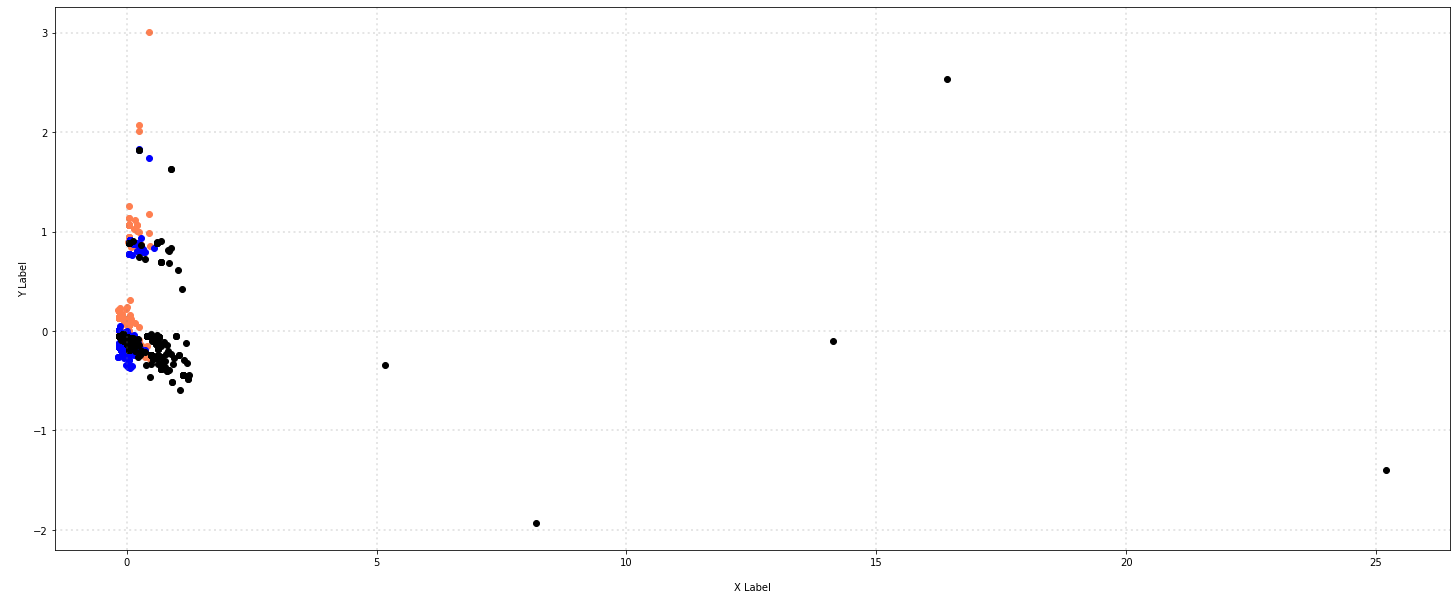

In [58]:
X_reduced = PCA(n_components = 2).fit_transform(reviews_counts.toarray())

col = ['coral', 'blue', 'black', 'm']
source = ['Yelp', 'Amazon', 'IMDB']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, source):
    xs = X_reduced[reviews['Source'] == s].T[0]
    ys = X_reduced[reviews['Source'] == s].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

## Attribute Transformation

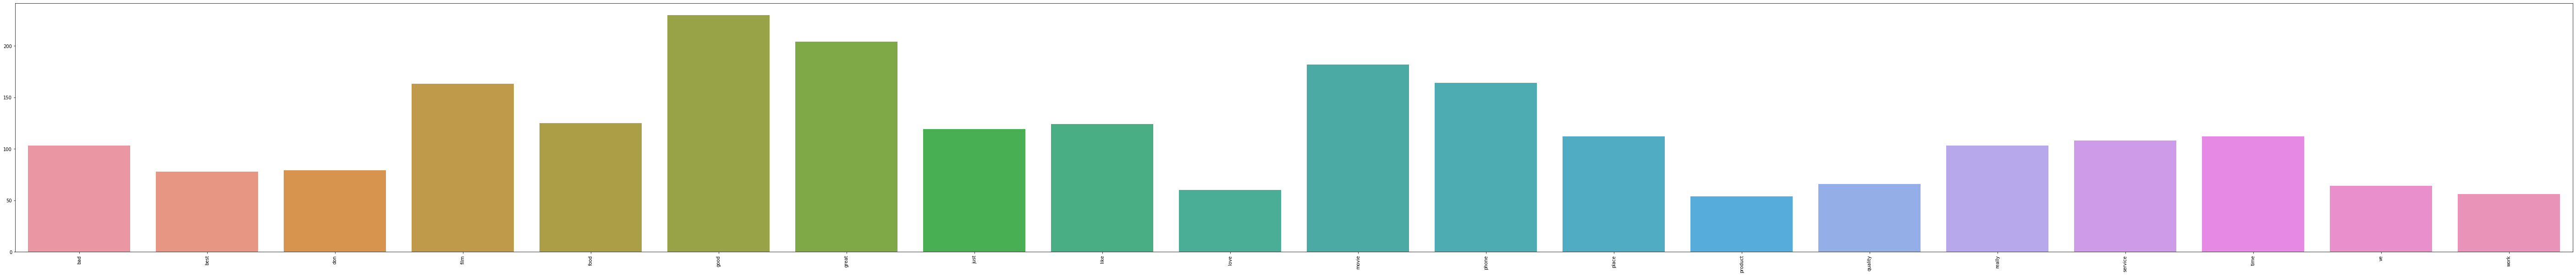

In [59]:
# term frequencies
term_frequencies = np.asarray(reviews_counts.sum(axis=0))[0]
# plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names(), 
            y=term_frequencies)
g.set_xticklabels(count_vect.get_feature_names(), rotation = 90);


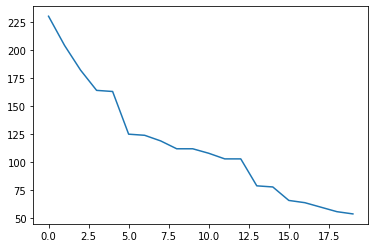

In [60]:
# long tail
long_tail = sorted(term_frequencies, reverse=True)
plt.plot(long_tail)

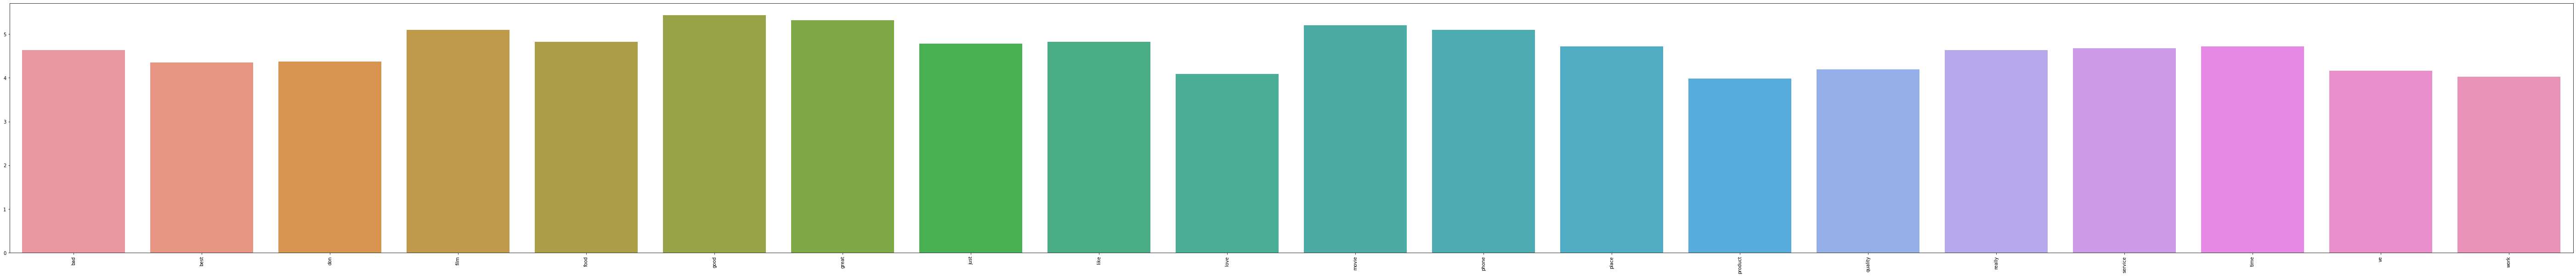

In [61]:
term_frequencies_log = [math.log(i) for i in term_frequencies]
# plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names(), 
            y=term_frequencies_log)
g.set_xticklabels(count_vect.get_feature_names(), rotation = 90);

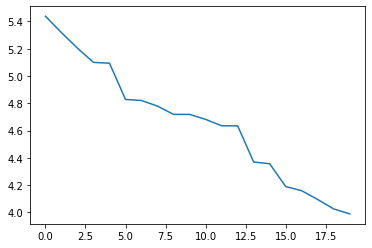

In [62]:
long_tail_log = sorted(term_frequencies_log, reverse=True)
plt.plot(long_tail_log)

## Data Exploration

In [63]:
document_to_transform_1 = []
random_record_1 = reviews.iloc[47]
random_record_1 = random_record_1['Sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = reviews.iloc[760]
random_record_2 = random_record_2['Sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = reviews.iloc[2244]
random_record_3 = random_record_3['Sentence']
document_to_transform_3.append(random_record_3)


# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

print("Doc 1:", document_to_transform_1)
print("Doc 2:", document_to_transform_2)
print("Doc 3:", document_to_transform_3)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Doc 1: ['The burger is good beef, cooked just right.']
Doc 2: ['Food was good, service was good, Prices were good.']
Doc 3: ['The sound quality for the device is unacceptable.Unless you are in a really quiet area, you almost hear nothing.']
Cosine Similarity using count bw 1 and 2: 0.639602
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


In [64]:
term_frequenc = []
for j in range(0,reviews_counts.shape[1]):
    term_frequenc.append(sum(reviews_counts[:,j].toarray()))
    
term_frequencies = np.asarray(reviews_counts.sum(axis=0))[0]

termfreq = pd.DataFrame( {'term':count_vect.get_feature_names(), 'freq': term_frequencies })
termfreq

term  freq
0       bad   103
1      best    78
2       don    79
3      film   163
4      food   125
5      good   230
6     great   204
7      just   119
8      like   124
9      love    60
10    movie   182
11    phone   164
12    place   112
13  product    54
14  quality    66
15   really   103
16  service   108
17     time   112
18       ve    64
19     work    56

# Third part
-New visualization

-Generate TF-IDF features from the tokens of each text

-Implement a simple Naive Bayes classifier

## New visualization

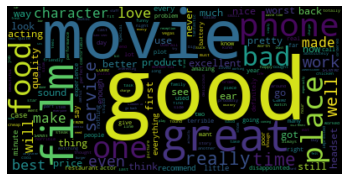

In [65]:
text = ''.join(reviews.Sentence)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

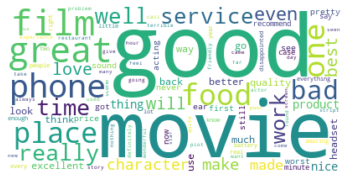

In [66]:
# add stopword & max words
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

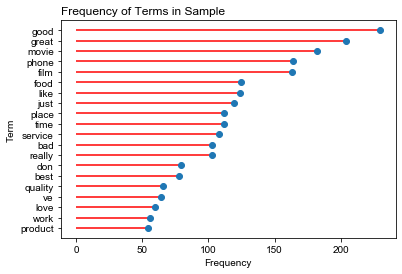

In [67]:
# Visualization 3: Graphing a Sample of Term Frequencies
termfreqsample = termfreq.sample(n=20)

# Sort Highest to Lowest
termfreqsample = termfreqsample.sort_values(by='freq')
my_range=range(1,len(termfreqsample.index)+1)

# Build Chart
plt.hlines(y=my_range, xmin=0, xmax=termfreqsample['freq'], color='red')
plt.style.use('seaborn-whitegrid')

 
# Add titles and axis names
plt.yticks(my_range, termfreqsample['term'])
plt.title("Frequency of Terms in Sample", loc='left')
plt.xlabel('Frequency')
plt.ylabel('Term')
plt.plot(termfreqsample['freq'], my_range, "o")

## Generate TF-IDF features

In [68]:
vectorizer = TfidfVectorizer()
reviews_tfidf = vectorizer.fit_transform(reviews["Sentence"])
tfidf_df = pd.DataFrame(reviews_tfidf.T.todense(), index=vectorizer.get_feature_names())

In [69]:
tfidf_df

0     1     2     3     4     5     6     7     8     9     ...  \
00        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
10        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
100       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
11        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
12        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
z500a     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zero      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zillion   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zombie    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
zombiez   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

         2721  2722  2723  2724  2725  2726  2727  2728  2729  2730  
00        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
10        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
100       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
11        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
12        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
z500a     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zero      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zillion   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zombie    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
zombiez   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5155 rows x 2731 columns]

In [70]:
tfidf_df[tfidf_df[0]>0]

0     1     2         3     4     5     6     7     8     9     \
loved  0.565956   0.0   0.0  0.237362   0.0   0.0   0.0   0.0   0.0   0.0   
place  0.406250   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
this   0.251381   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   
wow    0.671910   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   0.0   0.0   

       ...  2721  2722  2723  2724  2725  2726      2727  2728  2729  2730  
loved  ...   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
place  ...   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  
this   ...   0.0   0.0   0.0   0.0   0.0   0.0  0.160763   0.0   0.0   0.0  
wow    ...   0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0  

[4 rows x 2731 columns]

## Implement a simple Naive Bayes classifier

Bernoulli naive Bayes

In [71]:
count_vect = CountVectorizer()
reviews_count = count_vect.fit_transform(reviews.Sentence)

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(reviews_tfidf, reviews['label'], test_size=0.25)
x_train_count, x_test_count, y_train_count, y_test_count = train_test_split(reviews_count, reviews['label'], test_size=0.25)

bnb_tfidf = BernoulliNB(binarize=0.0)
bnb_tfidf.fit(X_train, Y_train)
y_pred1 = bnb.predict(X_test)

bnb_count = BernoulliNB(binarize=0.0)
bnb_count.fit(x_train_count, y_train_count)
y_pred2 = bnb.predict(x_test_count)

# prediction & evaluation
print('accuracy of tfidf features: %.4f' % accuracy_score(Y_test, y_pred1))
print('accuracy of count features: %.4f' % accuracy_score(y_test_count, y_pred2))

accuracy of tfidf features: 0.9019
accuracy of count features: 0.9151


Multinomial naive Bayes

In [80]:
X_train, X_test, y_train, y_test = train_test_split(reviews_tfidf, reviews['label'], test_size=0.25, random_state=10)
x_train_count, x_test_count, y_train_count, y_test_count = train_test_split(reviews_count, reviews['label'], test_size=0.25,random_state=10)

mnmodel_tfidf = MultinomialNB()
mnmodel_tfidf.fit(X_train, y_train)
y_pred1 = mnmodel.predict(X_test)

mnmodel_count = MultinomialNB()
mnmodel_count.fit(x_train_count,y_train_count)
y_pred2 = mnmodel.predict(x_test_count)

print('accuracy of tfidf features: %.4f' % accuracy_score(Y_test, y_pred1))
print('accuracy of count features: %.4f' % accuracy_score(y_test_count, y_pred2))

accuracy of tfidf features: 0.5022
accuracy of count features: 0.8141


The count feature one in both classifier have higher accuracy.This may due to the scale of the daata set.

# Forth Part

In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

Ans:

  For the data itself,it has category and category name in two colums which are basically the samthings.in order to reduce the data size we should eliminate one of them.
  In data preprocessing part,we did not process the data cleaning enough,we only check if there is null or duplicate data, but after we tokenized the data we did not eliminate the stop words or punctuation.This made us could not perform a more relevant analysis,furthermore it will make the unigrams a really large sparse matrix.Without a proper data simplified, we made the attribute transformation part harder to load the data,for instance the loading of term freqency cause too much time.We need to elimilate the irrelevant data or just use a sample of the data.For the data elimination I added max_features, max_df, min_df,removing some features that are possibly meaningless.
  
  In some of the visualiztion part,we plotted all the attributes or words which makes it hard for people to understand the result. we can also applied more advanced preprocessing method like word embedding, sentence embedding methods, which can give us a more representative feature vector.